# Data Exploration 1: Edinburgh Ladies Debating Society

This notebook explores museum objects that are from Edinburgh in the period from 1865 to 1880, to accompany the Jupyter notebook from the [[National Library of Scotland|https://nls.uk/]], looking at the publication [[Edinburgh Ladies Debating Society|https://data.nls.uk/tools/jupyter-notebooks/exploring-edinburgh-ladies-debating-society/]] from 1865 to 1880.

Using the following software:
  * Jupyter (and JupyterLab, and Jupyterbook) - To write this notebook
  * pandas - To explore the dataset
  * Altair - To graph the dataset
  * Ivpy - To show the images from the dataset
  * Requests - To make web requests to the Collections API
  * Many other libraries on which the above packages depend
  * and Python powering it all
 
And featuring a pair of snake-skin slippers.

In [1]:
import sys
sys.path.append("/home/richard/Notebooks/2020/Ivpy/ivpy/src/")

### Retrieving objects

First let's retrieve objects made from the period of interest. For that we need to pass three parameters to the API query to restrict it to the items of interest:
  * id_place - The place the object was made
  * year_made_from - The year of production from which we want to start getting results for objects
  * year_made_to - The year of production we want to stop getting results for objects
  
We need to pass values for the above parameters, the later two are easy enough, they are the yeays of interest:

  * year_made_from=1865
  * year_made_to=1880
  
The identifier value we need to pass for place is harder to get. There is not a quick way to map a place (Edinburgh) to it's identifier, of course this is the very reason we have identifiers in the first place. For the moment, a simple way to find it is to goto the [[collections site|https://collections.vam.ac.uk/]] in a browser, start typing the search term of interest (e.g. [[Edinburgh|https://collections.vam.ac.uk/search/?id_place=x28816]]). As you type the autocomplete box will come up with suggestions which in this case includes the one we want. If you click on that you will goto a query which in the address bar of your browser will show you the identifier used (in this case id_place=x28816).

(If a matchign suggestion does not come up when you type, then you will need to go through a more labouris process of running the search on what you have typed, then looking in the Facets on the left of your search for a match, in this case under "Place", ticking the relevant term, which will then appear in the address bar as above).

So now we know we need to pass:

  * id_place=x28816
  * year_made_from=1865
  * year_made_to=1880
    
We also specify the following:
  * images_exist=1 - As we want to show the images later
  * response_format=csv - We want results as CSV so we can 
  * page_size=50 - We want upto 50 results (if there are 50 available) 
  
And that's our API query. Let's get the results.

In [30]:
import requests
from ivpy import attach,show,compose,montage,histogram,scatter
import pandas as pd
import altair as alt
req = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?id_place=x28816&year_made_from=1865&year_made_to=1880&images_exist=1&response_format=csv&page_size=50')
req.head()

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,E.2527-1953,O589112,Religious card,NaN,Edinburgh,Unknown,artist,1860s,2015HK1180,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level C",False,False
1,E.2532-1953,O589107,Card,NaN,London,Unknown,artist,ca. 1880,2006AM2530,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
2,E.2533-1953,O589106,Card,NaN,London,Unknown,artist,ca. 1880,2006AM2529,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
3,E.2534-1953,O589105,Card,NaN,London,Unknown,artist,ca. 1880,2006AM2528,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
4,E.2535-1953,O589104,Card,NaN,London,Unknown,artist,ca. 1880,2006AM2527,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False


So we are getting data, lets look at the images to see if anything leaps out as belonging to the Edinburgh Ladies Debating Society.

### Showing images

To do this, we need to replace the \_primaryImageId asset identifier with a URL that can be opened by [[Ivpy|https://github.com/damoncrockett/ivpy]] so we can show a montage of the returned object images

In [31]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
req._primaryImageId = [IIIF_IMAGE_URL % item for item in req._primaryImageId]

In [32]:
req.head()

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,E.2527-1953,O589112,Religious card,NaN,Edinburgh,Unknown,artist,1860s,https://framemark.vam.ac.uk/collections/2015HK...,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level C",False,False
1,E.2532-1953,O589107,Card,NaN,London,Unknown,artist,ca. 1880,https://framemark.vam.ac.uk/collections/2006AM...,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
2,E.2533-1953,O589106,Card,NaN,London,Unknown,artist,ca. 1880,https://framemark.vam.ac.uk/collections/2006AM...,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
3,E.2534-1953,O589105,Card,NaN,London,Unknown,artist,ca. 1880,https://framemark.vam.ac.uk/collections/2006AM...,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False
4,E.2535-1953,O589104,Card,NaN,London,Unknown,artist,ca. 1880,https://framemark.vam.ac.uk/collections/2006AM...,lithographic ink,lithography,NaN,"Prints & Drawings Study Room, level E",False,False


Now we can use Ivpy to show the images

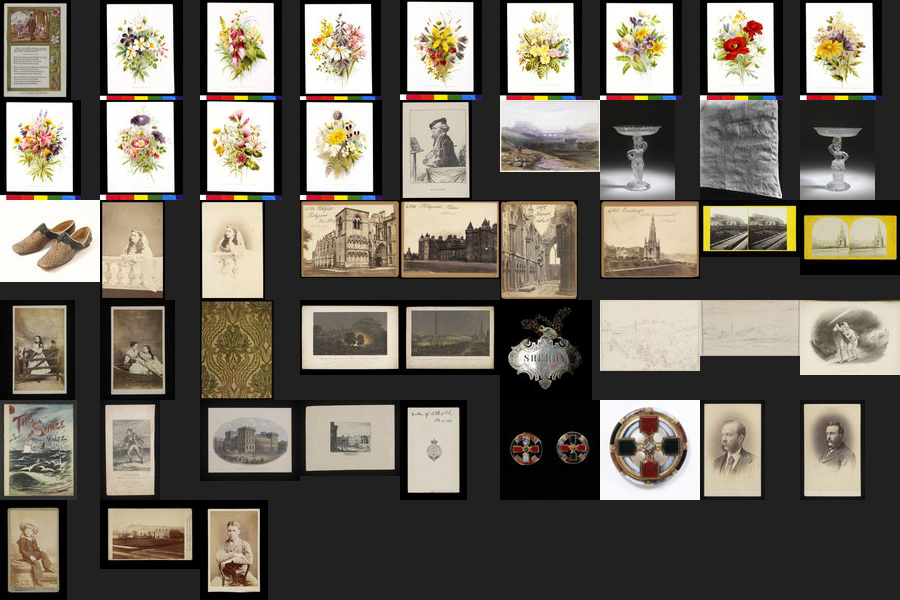

In [33]:
attach(req, "_primaryImageId")
show()

An interesting mix of objects, perhaps some of which overlap with topics in discussion in the Journal. Let's look at what type of objects are there:

### Graphing Results

In [42]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/object_type/search?id_place=x28816&year_made_from=1865&year_made_to=1880&cluster_size=100')
object_types_df = pd.DataFrame(req.json())

bars = alt.Chart(object_types_df).mark_bar().encode(
    x='count:Q',
    y="value:O"
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900, title="Objects from Edinburgh from 1865 to 1880")

alt.LayerChart(...)

So apart from cards, prints and photographs (here appearing twice due to capitalization) other objects have just one or two instances from this period. Let's look at the ambrotype (which is, according to [[Getty|http://vocab.getty.edu/page/aat/300127186]], "Photographs produced by mounting a negative (made by a variant of the wet collodion process) that is on glass with a dark backing, which makes the image appear as a positive."), perhaps it could depict someone from the Edinburgh Ladies ? First we need to find the object's system number:


### Individual Objects

In [23]:
req = pd.read_csv('https://api.vam.ac.uk/v2/objects/search?id_place=x28816&year_made_from=1865&year_made_to=1880&kw_object_type=ambrotype&response_format=csv&page_size=50')
req

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,RPS.1097-2019,O1508782,ambrotype,NaN,Edinburgh (city),"Armstrong, Robert",photographer,1855-1865,NaN,NaN,photography,NaN,NaN,False,False


Sadly, at the moment, there is no digitised image, but let's see if there is more information in the full object record.

In [24]:
req = requests.get('https://api.vam.ac.uk/v2/museumobject/O1508782/')
req.json()

{'meta': {'version': '2.0', 'images': None, 'see_also': None},
 'record': {'systemNumber': 'O1508782',
  'accessionNumber': 'RPS.1097-2019',
  'objectType': 'ambrotype',
  'titles': [],
  'summaryDescription': '',
  'physicalDescription': 'Ambrotype depicting a portrait of an man in a metal frame',
  'artistMakerPerson': [{'name': {'text': 'Armstrong, Robert',
     'id': 'AUTH353681'},
    'association': {'text': 'photographer', 'id': 'x43821'},
    'note': ''}],
  'artistMakerOrganisations': [],
  'artistMakerPeople': [],
  'materials': [],
  'techniques': [{'text': 'photography', 'id': 'AAT54225'},
   {'text': 'ambrotype', 'id': 'AAT137324'}],
  'materialsAndTechniques': 'Ambrotype photographic print',
  'categories': [{'text': 'The Royal Photographic Society',
    'id': 'THES281081'}],
  'styles': [],
  'collectionCode': {'text': 'DOP', 'id': 'THES291628'},
  'images': [],
  'imageResolution': 'high',
  'galleryLocations': [{'current': {'text': 'LVLF', 'id': 'THES49656'},
    'free'

Well, a "portrait of a man seated" could perhaps a relation of someone from the Society. Let's see if we have any more luck with the "Pair of slippers"

In [27]:
req = pd.read_csv("https://api.vam.ac.uk/v2/objects/search?id_place=x28816&year_made_from=1865&year_made_to=1880&kw_object_type=Pair%20of%20slippers&response_format=csv&page_size=50")
req

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,AP.6&A-1868,O62545,Pair of slippers,NaN,Edinburgh,"Muir, W.",maker,1850-1870,2006AM7015,NaN,NaN,NaN,"British Galleries, Room 125b",False,False


In [28]:
req = requests.get('https://api.vam.ac.uk/v2/museumobject/O62545/')
req.json()

{'meta': {'version': '2.0',
  'images': {'_primary_thumbnail': 'https://framemark.vam.ac.uk/collections/2006AM7015/full/!100,100/0/default.jpg',
   '_iiif_image': 'https://framemark.vam.ac.uk/collections/2006AM7015/',
   '_alt_iiif_image': [],
   '_images_meta': [{'assetRef': '2006AM7015',
     'copyright': '©Victoria and Albert Museum, London',
     'sensitiveImage': False},
    {'assetRef': '2006AW2026',
     'copyright': '©Victoria and Albert Museum, London',
     'sensitiveImage': False}]},
  'see_also': {'_iiif_pres': 'https://iiif.vam.ac.uk/collections/O62545/manifest.json',
   '_alt_iiif_pres': []}},
 'record': {'systemNumber': 'O62545',
  'accessionNumber': 'AP.6&A-1868',
  'objectType': 'Pair of slippers',
  'titles': [],
  'summaryDescription': "<b>Object Type</b><br>Men wore mules and slippers in the comfort of their homes. These were often not dissimilar in design to men's slippers today. They came in a variety of colours and materials and were often decorated with embroide

Hmmm, perhaps not. But maybe when that Ambrotype photograph is digitised we could see some snakeskin slippers being work in it. Let's take a closer look at them.

In [1]:
from ipyosd import OSDViewer
from ipywidgets import Layout
OSDViewer(url="https://framemark.vam.ac.uk/collections/2006AM7015/info.json", layout=Layout(width='75%', height='675px'))

OSDViewer(layout=Layout(height='675px', width='75%'), url='https://framemark.vam.ac.uk/collections/2006AM7015/…

Further possible areas for exploration:
  * Were any of the objects made or donated to the museum by people mentioned in the journal?
  * Are there discussions of artists and artworks from the period in the journal? 
  * Are there any discussions of places in the journal that match up with prints, drawings or photocards depicting them at the time ?